## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choice

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [160]:
results = pd.read_csv('QueryResults.csv', names=['date', 'tag', 'posts'], header=0)

hex_digits = ['a','b','c','d','e','f'] + [str(i) for i in range(0,10)]

def get_random_color():
    color = '#'
    for _ in range(6):
        color += choice(hex_digits)
    return color.upper()
    

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [161]:
print("first 5 rows:")
print("="*70)
print(results.head())
print('\n')
print("last 5 rows:")
print("="*70)
print(results.tail())

first 5 rows:
                  date         tag  posts
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


last 5 rows:
                     date    tag  posts
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [162]:
rows, cols = results.shape
print(f"there are {rows} rows and {cols} columns")

there are 1991 rows and 3 columns


**Challenge**: Count the number of entries in each column of the dataframe

In [163]:
for col in list(results.columns):
    unique_entries = set(results[col].values)
    print(f"There are {len(unique_entries)} unique {col}{'s' if (col[-1] != 's' and len(unique_entries)>1) else ''}")

There are 145 unique dates
There are 14 unique tags
There are 1645 unique posts


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [164]:
languages = results.groupby('tag').sum()
winner = languages[(languages['posts']==languages['posts'].max())]
print(winner[['posts']])

              posts
tag                
javascript  2056510


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [165]:
languages2 = results.groupby('tag').count()
print(languages2)

            date  posts
tag                    
assembly     144    144
c            144    144
c#           145    145
c++          144    144
delphi       144    144
go           129    129
java         144    144
javascript   144    144
perl         144    144
php          144    144
python       144    144
r            142    142
ruby         144    144
swift        135    135


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [166]:
results['date'] = pd.to_datetime(results['date'])
print(results.head())

        date         tag  posts
0 2008-07-01          c#      3
1 2008-08-01    assembly      8
2 2008-08-01  javascript    162
3 2008-08-01           c     85
4 2008-08-01      python    124


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [167]:
reshaped_results = results.pivot(index='date', columns='tag', values='posts')
reshaped_results.fillna(0, inplace=True)
rows2, cols2 = reshaped_results.shape
print(f"Now the dataframe has {rows2} rows and {cols2} columns")
print(f"Column names = {list(reshaped_results.columns)}")

Now the dataframe has 145 rows and 14 columns
Column names = ['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift']


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [168]:
print(reshaped_results.sum())

tag
assembly        34852.0
c              336042.0
c#            1423530.0
c++            684210.0
delphi          46212.0
go              47499.0
java          1696403.0
javascript    2056510.0
perl            65286.0
php           1361988.0
python        1496210.0
r              356799.0
ruby           214582.0
swift          273055.0
dtype: float64


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [194]:
x_vals = list(reshaped_results.columns)
posts = []
plt.figure()
for lang in x_vals:
    posts.append(reshaped_results[lang].sum())

<Figure size 640x480 with 0 Axes>

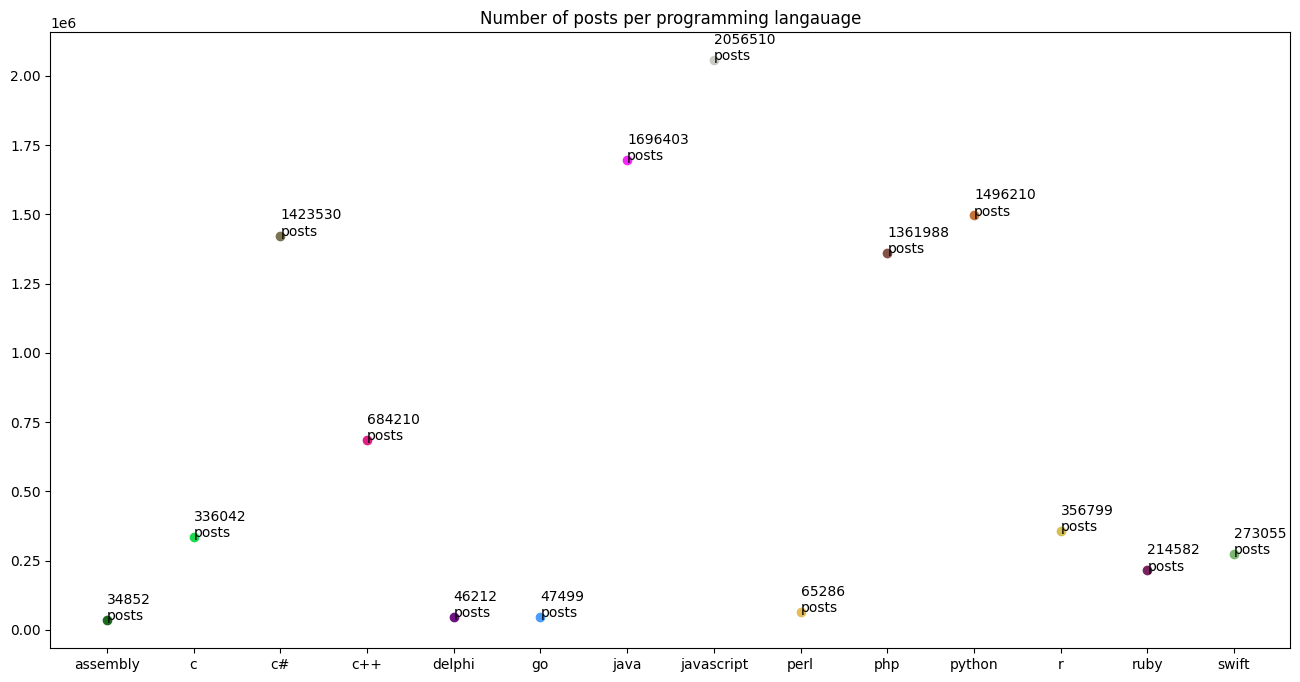

In [195]:
plt.figure(figsize=(16,8))
plt.title("Number of posts per programming langauage")
for i in range(len(x_vals)):
    plt.text(x_vals[i], posts[i], s=f'{int(posts[i])}\nposts')
    plt.scatter(x_vals[i], posts[i], c=get_random_color())

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

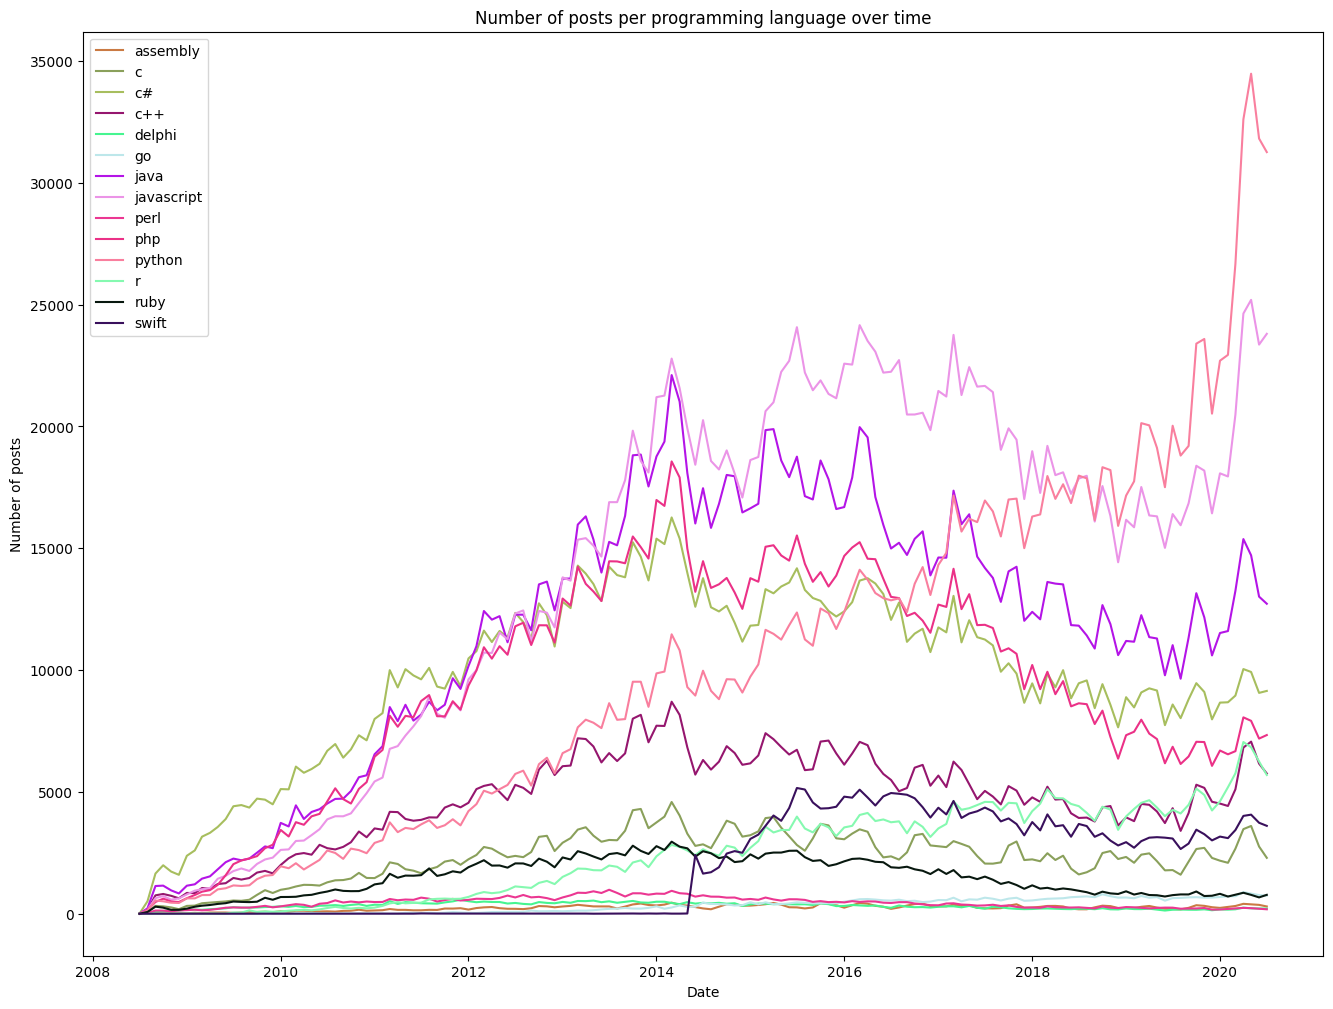

In [224]:
plt.figure(figsize=(16,12))
plt.title('Number of posts per programming language over time')
plt.xlabel('Date')
plt.ylabel('Number of posts')

for lang in x_vals:
    _results = reshaped_results[lang]
    plt.plot(_results, c=get_random_color(), label=lang)
    
plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

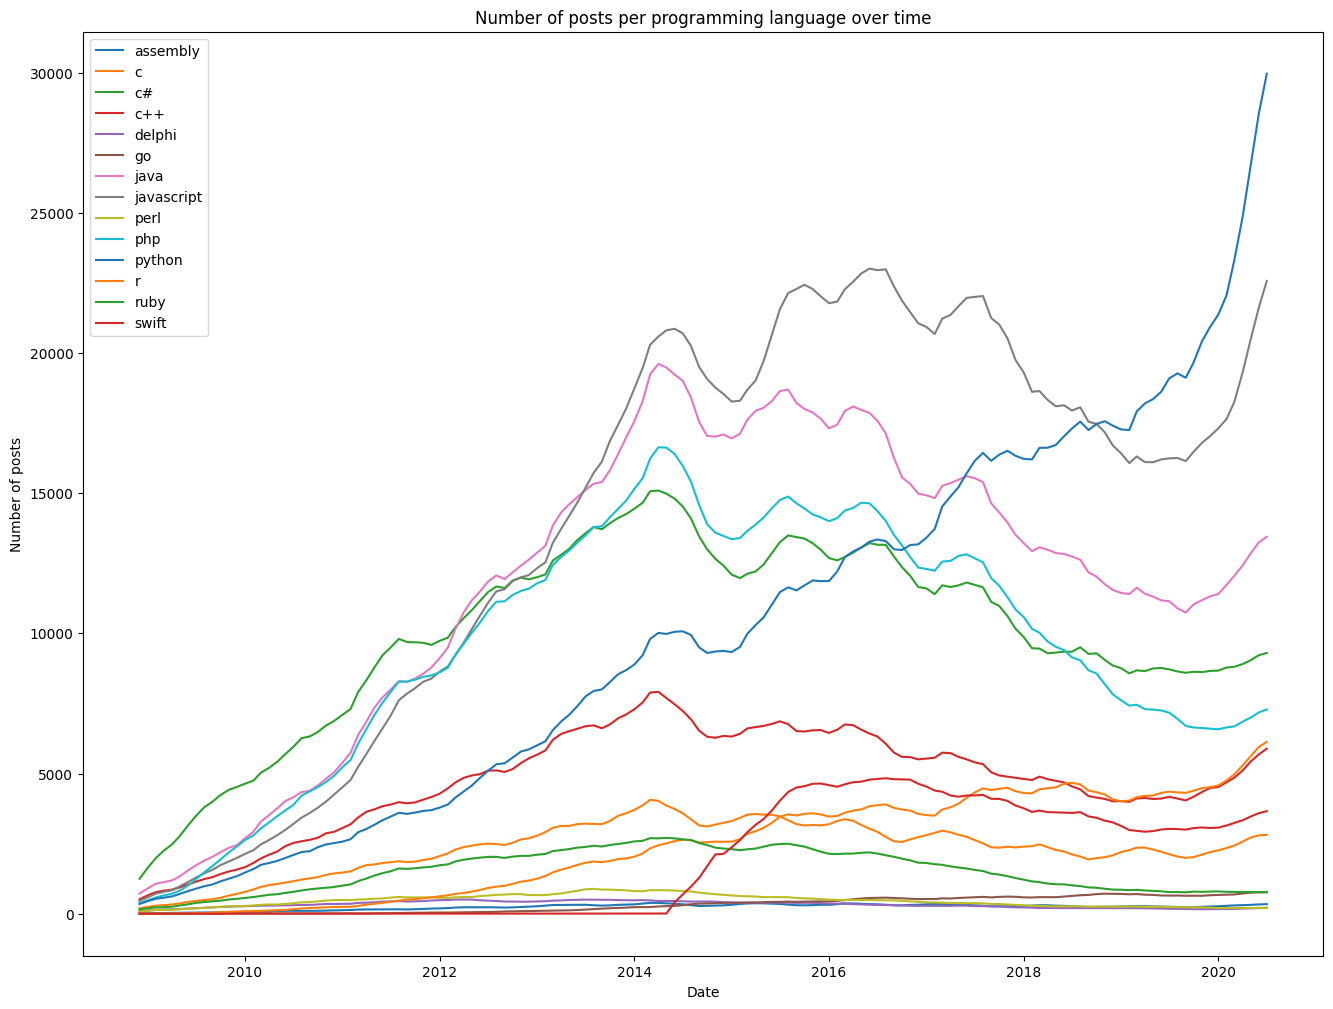

In [227]:
roll_df = reshaped_results.rolling(window=6).mean()

plt.figure(figsize=(16,12))
plt.title('Number of posts per programming language over time')
plt.xlabel('Date')
plt.ylabel('Number of posts')

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name)
    
plt.legend()